In [1]:
import pydub as pdb

In [2]:
exfile = pdb.AudioSegment.from_mp3("../_data/prelim_data/cry/0004_crying_219433_mono_mono.mp3")
exfile.duration_seconds

3.996734693877551

In [3]:
print(exfile.channels, len(exfile))
exfile[:4000]

1 3997


In [4]:
def plot_stereo(chL, chR, srate=44100, bdepth=16, mono=False):
    assert len(chL) == len(chR)
    
    chL = chL / (2**(bdepth-1))
    chR = chR / (2**(bdepth-1))
    
    samps_per_ms = srate / 1000
    
    xx = np.arange(len(chL)) / samps_per_ms
    
    if mono:
        plt.figure(figsize=(8, 3))
        plt.plot(xx, chL)
        plt.xticks(np.arange(0, 1.1 * (len(chL)/samps_per_ms), int(len(chL)/100/samps_per_ms)*10))
        plt.ylim(-1.1, 1.1)
        plt.title("Mono")
        plt.xlabel("ms"); plt.ylabel("amplitude")

    else:
        plt.subplot(2, 1, 1)
        plt.plot(xx, chL)
        plt.xticks(np.arange(0, 1.1 * (len(chL)/samps_per_ms), int(len(chL)/100/samps_per_ms)*10))
        plt.ylim(-1.1, 1.1)
        plt.title("L")
        plt.xlabel("ms"); plt.ylabel("amplitude")

        plt.subplot(2, 1, 2)
        plt.plot(xx, chR)
        plt.xticks(np.arange(0, 1.1 * (len(chL)/samps_per_ms), int(len(chL)/100/samps_per_ms)*10))
        plt.ylim(-1.1, 1.1)
        plt.title("R")
        plt.xlabel("ms"); plt.ylabel("amplitude")

    plt.tight_layout()
    plt.show()
    

def plot_audio(audioseg):
    audioseg_list = audioseg.get_array_of_samples().tolist()

    if audioseg.channels == 2:
        mono = False
        chL = np.array(audioseg_list[::2])
        chR = np.array(audioseg_list[1::2])
    elif audioseg.channels == 1:
        mono = True
        chL = np.array(audioseg_list)
        chR = np.array(chL)
    else:
        print("More than 2 channels not supported")
        return

    plot_stereo(chL, chR, audioseg.frame_rate, audioseg.sample_width*8, mono)    

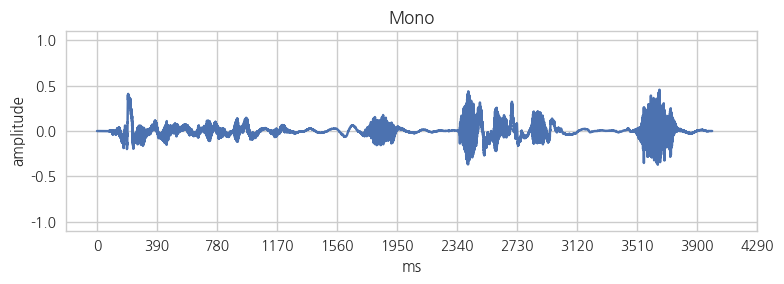

In [5]:
plot_audio(exfile[:4000])#, mono=True)

In [6]:
exfile_arr = exfile.get_array_of_samples().tolist()
len(exfile_arr), max(exfile_arr)

(88128, 14929)

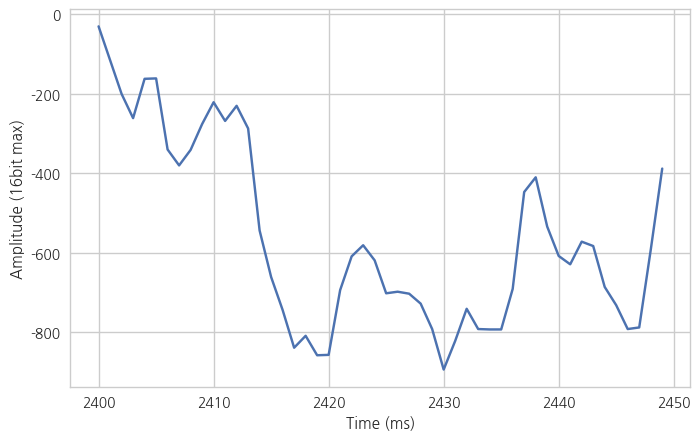

In [7]:
plt.plot(range(2400, 2450), exfile_arr[2400:2450])
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude (16bit max)")
plt.show()

In [8]:
df_wav = pd.read_csv('../_data/combined_csv/171212_87300samp_cry386_laugh703_with_ids.csv')

In [9]:
df_wav.sample(20)

,sound_id,0,1,2,3,4,5,6,7,8,...,87291,87292,87293,87294,87295,87296,87297,87298,87299,laugh
521,382998,0,0,0,0,0,0,0,0,0,...,2,2,2,1,0,0,0,0,0,1.0
810,111031,0,0,0,0,0,0,0,0,1,...,3,2,1,-1,-2,-5,-5,-5,-2,1.0
602,368758,0,0,0,0,1,0,0,0,0,...,19,-45,-73,-123,-166,-185,-183,-174,-181,1.0
492,184599,0,0,0,0,0,0,-1,0,0,...,4,2,0,0,1,1,2,2,2,1.0
837,256028,0,0,0,0,0,0,0,0,0,...,2,1,2,2,2,2,1,-1,-1,1.0
738,137205,-1,-1,0,0,0,-1,0,0,0,...,84,-16,-29,20,-39,-92,-24,25,6,1.0
194,130628,0,0,0,0,0,0,0,0,0,...,-8,-13,-18,-20,-21,-25,-30,-33,-34,0.0
392,9550,0,0,0,0,0,0,0,0,0,...,-22,-6,-1,12,16,8,22,49,49,1.0
215,145390,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,-1,0.0
366,174994,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0.0


In [10]:
import librosa as la
import librosa.display as lad

In [11]:
exfile_ndarr = np.array(exfile_arr)
exfile_mfcc = la.feature.mfcc(exfile_ndarr, sr=22050, )

### MFCC plot example

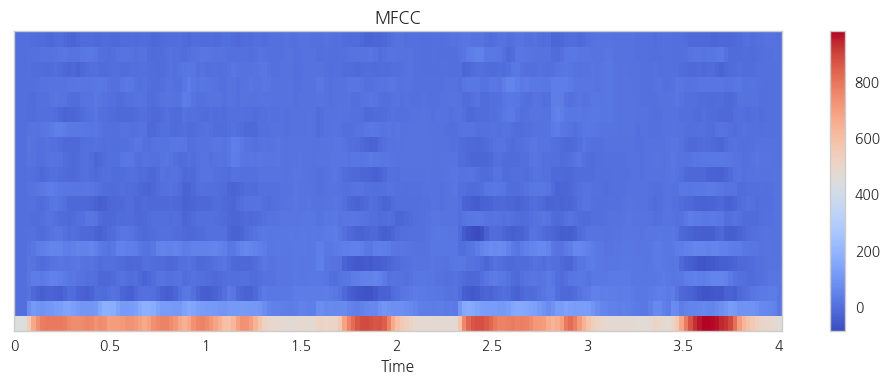

In [12]:
plt.figure(figsize=(10, 4))
lad.specshow(exfile_mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

### TODO
* Modify ibab's TensorFlow implementation of WaveNet for classification
  * Dilated conv layer with dense 'tail'
  * Goal is >50% accuracy
* Compare results vs. regular CNN with extracted MFCCs
* Expand dataset? (Web Archive, MAHNOB dataset, film excerpts, etc.)

silence trim script -gt => -ge?